In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [12]:
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal
#from scipy.optimize import curve_fit
#import scipy.special as sps

In [13]:
x = np.array([
    2.500e-02,7.500e-02,1.250e-01,1.750e-01,2.250e-01,2.750e-01,3.250e-01,3.750e-01,4.250e-01,4.750e-01,5.250e-01,5.750e-01,6.250e-01,6.750e-01,7.250e-01,7.750e-01,8.250e-01,8.750e-01,9.250e-01,9.750e-01,1.025e+00,1.075e+00,1.125e+00,1.175e+00,1.225e+00,1.275e+00,1.325e+00,1.375e+00,1.425e+00,1.475e+00,1.525e+00,1.575e+00,1.625e+00,1.675e+00,1.725e+00,1.775e+00,1.825e+00,1.875e+00,1.925e+00,1.975e+00,2.025e+00,2.075e+00,2.125e+00,2.175e+00,2.225e+00,2.275e+00,2.325e+00,2.375e+00,2.425e+00,2.475e+00,2.525e+00,2.575e+00,2.625e+00,2.675e+00,2.725e+00,2.775e+00,2.825e+00,2.875e+00,2.925e+00,2.975e+00,3.025e+00,3.075e+00,3.125e+00,3.175e+00,3.225e+00,3.275e+00,3.325e+00,3.375e+00,3.425e+00,3.475e+00,3.525e+00,3.575e+00,3.625e+00,3.675e+00,3.725e+00,3.775e+00,3.825e+00,3.875e+00,3.925e+00,3.975e+00,4.025e+00,4.075e+00,4.125e+00,4.175e+00,4.225e+00,4.275e+00,4.325e+00,4.375e+00,4.425e+00,4.475e+00,4.525e+00,4.575e+00,4.625e+00,4.675e+00,4.725e+00,4.775e+00,4.825e+00,4.875e+00,4.925e+00,4.975e+00,5.025e+00,5.075e+00,5.125e+00,5.175e+00,5.225e+00,5.275e+00,5.325e+00,5.375e+00,5.425e+00,5.475e+00,5.525e+00,5.575e+00,5.625e+00,5.675e+00,5.725e+00,5.775e+00,5.825e+00,5.875e+00,5.925e+00,5.975e+00,6.025e+00,6.075e+00,6.125e+00,6.175e+00,6.225e+00,6.275e+00,6.325e+00,6.375e+00,6.425e+00,6.475e+00,6.525e+00,6.575e+00,6.625e+00,6.675e+00,6.725e+00,6.775e+00,6.825e+00,6.875e+00,6.925e+00,6.975e+00,7.025e+00,7.075e+00,7.125e+00,7.175e+00,7.225e+00,7.275e+00,7.325e+00,7.375e+00,7.425e+00,7.475e+00,7.525e+00,7.575e+00,7.625e+00,7.675e+00,7.725e+00,7.775e+00,7.825e+00,7.875e+00,7.925e+00,7.975e+00,8.025e+00,8.075e+00,8.125e+00,8.175e+00,8.225e+00,8.275e+00,8.325e+00,8.375e+00,8.425e+00,8.475e+00,8.525e+00,8.575e+00,8.625e+00,8.675e+00,8.725e+00,8.775e+00,8.825e+00,8.875e+00,8.925e+00,8.975e+00,9.025e+00,9.075e+00,9.125e+00,9.175e+00,9.225e+00,9.275e+00,9.325e+00,9.375e+00,9.425e+00,9.475e+00,9.525e+00,9.575e+00,9.625e+00,9.675e+00,9.725e+00,9.775e+00,9.825e+00,9.875e+00,9.925e+00,9.975e+00
])
print(len(x))

truth = np.array([
    1.021e+11,1.018e+11,1.013e+11,1.006e+11,9.957e+10,9.833e+10,9.687e+10,9.519e+10,9.330e+10,9.123e+10,8.898e+10,8.656e+10,8.400e+10,8.132e+10,7.852e+10,7.563e+10,7.267e+10,6.964e+10,6.658e+10,6.349e+10,6.040e+10,5.731e+10,5.424e+10,5.121e+10,4.823e+10,4.531e+10,4.246e+10,3.969e+10,3.700e+10,3.442e+10,3.193e+10,2.955e+10,2.728e+10,2.512e+10,2.307e+10,2.114e+10,1.932e+10,1.761e+10,1.602e+10,1.453e+10,1.315e+10,1.187e+10,1.068e+10,9.595e+09,8.596e+09,7.681e+09,6.847e+09,6.088e+09,5.400e+09,4.777e+09,4.216e+09,3.712e+09,3.259e+09,2.855e+09,2.494e+09,2.174e+09,1.890e+09,1.639e+09,1.418e+09,1.223e+09,1.053e+09,9.041e+08,7.743e+08,6.615e+08,5.637e+08,4.792e+08,4.063e+08,3.437e+08,2.899e+08,2.440e+08,2.048e+08,1.715e+08,1.433e+08,1.194e+08,9.922e+07,8.226e+07,6.803e+07,5.612e+07,4.618e+07,3.790e+07,3.103e+07,2.535e+07,2.065e+07,1.678e+07,1.360e+07,1.100e+07,8.871e+06,7.137e+06,5.728e+06,4.586e+06,3.662e+06,2.917e+06,2.318e+06,1.837e+06,1.452e+06,1.145e+06,9.010e+05,7.070e+05,5.534e+05,4.321e+05,3.365e+05,2.614e+05,2.026e+05,1.566e+05,1.208e+05,9.289e+04,7.127e+04,5.454e+04,4.164e+04,3.171e+04,2.409e+04,1.825e+04,1.379e+04,1.040e+04,7.821e+03,5.867e+03,4.390e+03,3.277e+03,2.440e+03,1.812e+03,1.343e+03,9.922e+02,7.314e+02,5.378e+02,3.945e+02,2.886e+02,2.107e+02,1.534e+02,1.114e+02,8.067e+01,5.829e+01,4.201e+01,3.021e+01,2.166e+01,1.550e+01,1.106e+01,7.872e+00,5.589e+00,3.959e+00,2.797e+00,1.971e+00,1.386e+00,9.716e-01,6.796e-01,4.742e-01,3.300e-01,2.291e-01,1.587e-01,1.096e-01,7.552e-02,5.191e-02,3.559e-02,2.434e-02,1.660e-02,1.130e-02,7.670e-03,5.193e-03,3.508e-03,2.363e-03,1.588e-03,1.065e-03,7.120e-04,4.749e-04,3.160e-04,2.097e-04,1.389e-04,9.170e-05,6.041e-05,3.969e-05,2.602e-05,1.701e-05,1.109e-05,7.218e-06,4.684e-06,3.032e-06,1.958e-06,1.261e-06,8.102e-07,5.192e-07,3.319e-07,2.117e-07,1.347e-07,8.544e-08,5.408e-08,3.414e-08,2.150e-08,1.351e-08,8.464e-09,5.290e-09,3.299e-09,2.052e-09,1.273e-09,7.877e-10,4.862e-10,2.994e-10,1.839e-10,1.127e-10,6.886e-11,4.198e-11,2.553e-11
  #  5.227e+10,5.214e+10,5.188e+10,5.149e+10,5.098e+10,5.035e+10,4.960e+10,4.874e+10,4.777e+10,4.671e+10,4.556e+10,4.432e+10,4.301e+10,4.164e+10,4.020e+10,3.872e+10,3.721e+10,3.566e+10,3.409e+10,3.251e+10,3.092e+10,2.934e+10,2.777e+10,2.622e+10,2.469e+10,2.320e+10,2.174e+10,2.032e+10,1.895e+10,1.762e+10,1.635e+10,1.513e+10,1.397e+10,1.286e+10,1.181e+10,1.082e+10,9.892e+09,9.018e+09,8.201e+09,7.439e+09,6.731e+09,6.076e+09,5.470e+09,4.913e+09,4.401e+09,3.933e+09,3.506e+09,3.117e+09,2.765e+09,2.446e+09,2.159e+09,1.900e+09,1.669e+09,1.462e+09,1.277e+09,1.113e+09,9.677e+08,8.392e+08,7.259e+08,6.264e+08,5.391e+08,4.629e+08,3.964e+08,3.387e+08,2.886e+08,2.453e+08,2.080e+08,1.759e+08,1.484e+08,1.249e+08,1.049e+08,8.782e+07,7.336e+07,6.112e+07,5.080e+07,4.212e+07,3.483e+07,2.873e+07,2.364e+07,1.941e+07,1.589e+07,1.298e+07,1.057e+07,8.591e+06,6.964e+06,5.631e+06,4.542e+06,3.654e+06,2.933e+06,2.348e+06,1.875e+06,1.493e+06,1.187e+06,9.405e+05,7.436e+05,5.864e+05,4.613e+05,3.620e+05,2.833e+05,2.212e+05,1.723e+05,1.339e+05,1.037e+05,8.019e+04,6.183e+04,4.756e+04,3.649e+04,2.793e+04,2.132e+04,1.623e+04,1.233e+04,9.344e+03,7.062e+03,5.325e+03,4.004e+03,3.004e+03,2.248e+03,1.678e+03,1.249e+03,9.279e+02,6.874e+02,5.080e+02,3.745e+02,2.754e+02,2.020e+02,1.478e+02,1.079e+02,7.852e+01,5.702e+01,4.130e+01,2.984e+01,2.151e+01,1.547e+01,1.109e+01,7.935e+00,5.662e+00,4.030e+00,2.862e+00,2.027e+00,1.432e+00,1.009e+00,7.094e-01,4.975e-01,3.480e-01,2.428e-01,1.690e-01,1.173e-01,8.123e-02,5.611e-02,3.867e-02,2.658e-02,1.822e-02,1.246e-02,8.502e-03,5.785e-03,3.927e-03,2.659e-03,1.796e-03,1.210e-03,8.132e-04,5.451e-04,3.645e-04,2.432e-04,1.618e-04,1.074e-04,7.109e-05,4.695e-05,3.093e-05,2.032e-05,1.332e-05,8.709e-06,5.680e-06,3.695e-06,2.398e-06,1.552e-06,1.002e-06,6.456e-07,4.148e-07,2.659e-07,1.700e-07,1.084e-07,6.894e-08,4.374e-08,2.769e-08,1.748e-08,1.101e-08,6.915e-09,4.333e-09,2.709e-09,1.689e-09,1.050e-09,6.517e-10,4.033e-10,2.490e-10,1.533e-10,9.416e-11,5.769e-11,3.526e-11,2.149e-11,1.307e-11
    #    5.227e+10,5.214e+10,5.188e+10,5.149e+10,5.098e+10,5.035e+10,4.960e+10,4.874e+10,4.777e+10,4.671e+10,4.556e+10,4.432e+10,4.301e+10,4.164e+10,4.020e+10,3.872e+10,3.721e+10,3.566e+10,3.409e+10,3.251e+10,3.092e+10,2.934e+10,2.777e+10,2.622e+10,2.469e+10,2.320e+10,2.174e+10,2.032e+10,1.895e+10,1.762e+10,1.635e+10,1.513e+10,1.397e+10,1.286e+10,1.181e+10,1.082e+10,9.892e+09,9.018e+09,8.201e+09,7.439e+09,6.731e+09,6.076e+09,5.470e+09,4.913e+09,4.401e+09,3.933e+09,3.506e+09,3.117e+09,2.765e+09,2.446e+09,2.159e+09,1.900e+09,1.669e+09,1.462e+09,1.277e+09,1.113e+09,9.676e+08,8.391e+08,7.258e+08,6.263e+08,5.391e+08,4.628e+08,3.964e+08,3.386e+08,2.886e+08,2.453e+08,2.080e+08,1.759e+08,1.484e+08,1.249e+08,1.049e+08,8.780e+07,7.334e+07,6.111e+07,5.079e+07,4.211e+07,3.482e+07,2.872e+07,2.364e+07,1.940e+07,1.588e+07,1.297e+07,1.057e+07,8.588e+06,6.962e+06,5.629e+06,4.540e+06,3.653e+06,2.932e+06,2.347e+06,1.874e+06,1.493e+06,1.186e+06,9.401e+05,7.432e+05,5.861e+05,4.611e+05,3.618e+05,2.832e+05,2.211e+05,1.722e+05,1.338e+05,1.037e+05,8.014e+04,6.179e+04,4.753e+04,3.647e+04,2.791e+04,2.131e+04,1.622e+04,1.232e+04,9.338e+03,7.058e+03,5.321e+03,4.002e+03,3.002e+03,2.246e+03,1.677e+03,1.248e+03,9.272e+02,6.869e+02,5.076e+02,3.742e+02,2.751e+02,2.018e+02,1.477e+02,1.078e+02,7.845e+01,5.697e+01,4.127e+01,2.982e+01,2.149e+01,1.545e+01,1.108e+01,7.927e+00,5.656e+00,4.026e+00,2.859e+00,2.025e+00,1.430e+00,1.008e+00,7.086e-01,4.969e-01,3.475e-01,2.425e-01,1.688e-01,1.172e-01,8.113e-02,5.604e-02,3.862e-02,2.654e-02,1.820e-02,1.244e-02,8.490e-03,5.777e-03,3.921e-03,2.655e-03,1.793e-03,1.208e-03,8.119e-04,5.443e-04,3.639e-04,2.428e-04,1.615e-04,1.072e-04,7.097e-05,4.686e-05,3.087e-05,2.028e-05,1.330e-05,8.693e-06,5.669e-06,3.688e-06,2.393e-06,1.549e-06,1.000e-06,6.442e-07,4.139e-07,2.653e-07,1.696e-07,1.081e-07,6.878e-08,4.364e-08,2.762e-08,1.744e-08,1.098e-08,6.897e-09,4.322e-09,2.701e-09,1.684e-09,1.047e-09,6.498e-10,4.021e-10,2.482e-10,1.528e-10,9.387e-11,5.751e-11,3.515e-11,2.143e-11,1.303e-11
  #4.084e+06,4.073e+06,4.053e+06,4.023e+06,3.983e+06,3.933e+06,3.875e+06,3.808e+06,3.732e+06,3.649e+06,3.559e+06,3.463e+06,3.360e+06,3.253e+06,3.141e+06,3.025e+06,2.907e+06,2.786e+06,2.663e+06,2.540e+06,2.416e+06,2.292e+06,2.170e+06,2.048e+06,1.929e+06,1.812e+06,1.698e+06,1.587e+06,1.480e+06,1.377e+06,1.277e+06,1.182e+06,1.091e+06,1.005e+06,9.229e+05,8.456e+05,7.728e+05,7.045e+05,6.407e+05,5.812e+05,5.259e+05,4.747e+05,4.273e+05,3.838e+05,3.438e+05,3.072e+05,2.739e+05,2.435e+05,2.160e+05,1.911e+05,1.686e+05,1.484e+05,1.304e+05,1.142e+05,9.976e+04,8.695e+04,7.559e+04,6.555e+04,5.671e+04,4.893e+04,4.212e+04,3.616e+04,3.097e+04,2.646e+04,2.254e+04,1.916e+04,1.625e+04,1.374e+04,1.160e+04,9.758e+03,8.192e+03,6.860e+03,5.730e+03,4.774e+03,3.968e+03,3.290e+03,2.720e+03,2.244e+03,1.847e+03,1.516e+03,1.241e+03,1.014e+03,8.257e+02,6.710e+02,5.439e+02,4.398e+02,3.547e+02,2.854e+02,2.290e+02,1.834e+02,1.464e+02,1.166e+02,9.266e+01,7.344e+01,5.806e+01,4.579e+01,3.602e+01,2.827e+01,2.212e+01,1.727e+01,1.345e+01,1.045e+01,8.100e+00,6.261e+00,4.828e+00,3.713e+00,2.849e+00,2.180e+00,1.664e+00,1.268e+00,9.628e-01,7.295e-01,5.514e-01,4.157e-01,3.126e-01,2.345e-01,1.755e-01,1.310e-01,9.753e-02,7.243e-02,5.366e-02,3.966e-02,2.923e-02,2.150e-02,1.577e-02,1.154e-02,8.419e-03,6.129e-03,4.451e-03,3.224e-03,2.329e-03,1.679e-03,1.207e-03,8.657e-04,6.193e-04,4.419e-04,3.145e-04,2.233e-04,1.582e-04,1.117e-04,7.875e-05,5.536e-05,3.882e-05,2.715e-05,1.894e-05,1.318e-05,9.153e-06,6.338e-06,4.378e-06,3.017e-06,2.074e-06,1.422e-06,9.723e-07,6.633e-07,4.513e-07,3.064e-07,2.074e-07,1.401e-07,9.439e-08,6.343e-08,4.252e-08,2.843e-08,1.897e-08,1.262e-08,8.375e-09,5.544e-09,3.661e-09,2.412e-09,1.585e-09,1.039e-09,6.791e-10,4.429e-10,2.881e-10,1.870e-10,1.210e-10,7.814e-11,5.033e-11,3.234e-11,2.072e-11,1.325e-11,8.447e-12,5.373e-12,3.409e-12,2.158e-12,1.362e-12,8.578e-13,5.389e-13,3.376e-13,2.110e-13,1.316e-13,8.183e-14,5.077e-14,3.142e-14,1.939e-14,1.194e-14,7.334e-15,4.493e-15,2.746e-15,1.674e-15,1.018e-15,
  #4.084e+08,4.074e+08,4.053e+08,4.023e+08,3.983e+08,3.934e+08,3.875e+08,3.808e+08,3.732e+08,3.649e+08,3.559e+08,3.463e+08,3.360e+08,3.253e+08,3.141e+08,3.025e+08,2.907e+08,2.786e+08,2.663e+08,2.540e+08,2.416e+08,2.292e+08,2.170e+08,2.048e+08,1.929e+08,1.812e+08,1.698e+08,1.587e+08,1.480e+08,1.377e+08,1.277e+08,1.182e+08,1.091e+08,1.005e+08,9.227e+07,8.454e+07,7.726e+07,7.044e+07,6.405e+07,5.810e+07,5.257e+07,4.745e+07,4.272e+07,3.837e+07,3.437e+07,3.071e+07,2.738e+07,2.434e+07,2.159e+07,1.910e+07,1.686e+07,1.484e+07,1.303e+07,1.141e+07,9.971e+06,8.690e+06,7.555e+06,6.552e+06,5.667e+06,4.890e+06,4.209e+06,3.614e+06,3.095e+06,2.644e+06,2.253e+06,1.915e+06,1.624e+06,1.373e+06,1.159e+06,9.750e+05,8.185e+05,6.854e+05,5.725e+05,4.770e+05,3.964e+05,3.286e+05,2.718e+05,2.242e+05,1.845e+05,1.514e+05,1.240e+05,1.012e+05,8.247e+04,6.702e+04,5.432e+04,4.392e+04,3.543e+04,2.850e+04,2.287e+04,1.831e+04,1.462e+04,1.165e+04,9.253e+03,7.334e+03,5.798e+03,4.572e+03,3.597e+03,2.822e+03,2.209e+03,1.725e+03,1.343e+03,1.043e+03,8.085e+02,6.250e+02,4.819e+02,3.706e+02,2.844e+02,2.176e+02,1.661e+02,1.265e+02,9.608e+01,7.280e+01,5.502e+01,4.148e+01,3.119e+01,2.340e+01,1.751e+01,1.307e+01,9.730e+00,7.226e+00,5.353e+00,3.956e+00,2.916e+00,2.144e+00,1.573e+00,1.150e+00,8.396e-01,6.112e-01,4.438e-01,3.215e-01,2.323e-01,1.674e-01,1.204e-01,8.631e-02,6.174e-02,4.405e-02,3.136e-02,2.226e-02,1.577e-02,1.114e-02,7.849e-03,5.517e-03,3.869e-03,2.706e-03,1.888e-03,1.314e-03,9.120e-04,6.315e-04,4.362e-04,3.006e-04,2.066e-04,1.416e-04,9.685e-05,6.607e-05,4.495e-05,3.051e-05,2.066e-05,1.395e-05,9.399e-06,6.316e-06,4.234e-06,2.831e-06,1.888e-06,1.256e-06,8.337e-07,5.519e-07,3.644e-07,2.401e-07,1.577e-07,1.034e-07,6.758e-08,4.407e-08,2.867e-08,1.860e-08,1.204e-08,7.775e-09,5.007e-09,3.217e-09,2.061e-09,1.318e-09,8.402e-10,5.344e-10,3.390e-10,2.146e-10,1.354e-10,8.529e-11,5.358e-11,3.357e-11,2.098e-11,1.308e-11,8.134e-12,5.046e-12,3.122e-12,1.927e-12,1.187e-12,7.287e-13,4.464e-13,2.728e-13,1.663e-13,1.011e-13
    #4.084e+07,4.074e+07,4.053e+07,4.023e+07,3.983e+07,3.934e+07,3.875e+07,3.808e+07,3.732e+07,3.649e+07,3.559e+07,3.463e+07,3.360e+07,3.253e+07,3.141e+07,3.025e+07,2.907e+07,2.786e+07,2.663e+07,2.540e+07,2.416e+07,2.292e+07,2.170e+07,2.048e+07,1.929e+07,1.812e+07,1.698e+07,1.587e+07,1.480e+07,1.377e+07,1.277e+07,1.182e+07,1.091e+07,1.005e+07,9.227e+06,8.454e+06,7.726e+06,7.044e+06,6.405e+06,5.810e+06,5.257e+06,4.745e+06,4.272e+06,3.837e+06,3.437e+06,3.071e+06,2.738e+06,2.434e+06,2.159e+06,1.910e+06,1.686e+06,1.484e+06,1.303e+06,1.141e+06,9.971e+05,8.690e+05,7.555e+05,6.552e+05,5.667e+05,4.890e+05,4.209e+05,3.614e+05,3.095e+05,2.644e+05,2.253e+05,1.915e+05,1.624e+05,1.373e+05,1.159e+05,9.750e+04,8.185e+04,6.854e+04,5.725e+04,4.770e+04,3.964e+04,3.286e+04,2.718e+04,2.242e+04,1.845e+04,1.514e+04,1.240e+04,1.012e+04,8.247e+03,6.702e+03,5.432e+03,4.392e+03,3.543e+03,2.850e+03,2.287e+03,1.831e+03,1.462e+03,1.165e+03,9.253e+02,7.334e+02,5.798e+02,4.572e+02,3.597e+02,2.822e+02,2.209e+02,1.725e+02,1.343e+02,1.043e+02,8.085e+01,6.250e+01,4.819e+01,3.706e+01,2.844e+01,2.176e+01,1.661e+01,1.265e+01,9.608e+00,7.280e+00,5.502e+00,4.148e+00,3.119e+00,2.340e+00,1.751e+00,1.307e+00,9.730e-01,7.226e-01,5.353e-01,3.956e-01,2.916e-01,2.144e-01,1.573e-01,1.150e-01,8.396e-02,6.112e-02,4.438e-02,3.215e-02,2.323e-02,1.674e-02,1.204e-02,8.631e-03,6.174e-03,4.405e-03,3.136e-03,2.226e-03,1.577e-03,1.114e-03,7.849e-04,5.517e-04,3.869e-04,2.706e-04,1.888e-04,1.314e-04,9.120e-05,6.315e-05,4.362e-05,3.006e-05,2.066e-05,1.416e-05,9.685e-06,6.607e-06,4.495e-06,3.051e-06,2.066e-06,1.395e-06,9.399e-07,6.316e-07,4.234e-07,2.831e-07,1.888e-07,1.256e-07,8.337e-08,5.519e-08,3.644e-08,2.401e-08,1.577e-08,1.034e-08,6.758e-09,4.407e-09,2.867e-09,1.860e-09,1.204e-09,7.775e-10,5.007e-10,3.217e-10,2.061e-10,1.318e-10,8.402e-11,5.344e-11,3.390e-11,2.146e-11,1.354e-11,8.529e-12,5.358e-12,3.357e-12,2.098e-12,1.308e-12,8.134e-13,5.046e-13,3.122e-13,1.927e-13,1.187e-13,7.287e-14,4.464e-14,2.728e-14,1.663e-14,1.011e-14
])

print(len(truth), np.sum(truth))

# truth = 1000.*truth
    

200
200 2559994533636.1655


In [14]:
print(2560000000000./10.e9)

val23 = np.array([
    102087290695,101832393286,101324343947,100567733284,99566941374,98330058568,96866329038,95186138424,93301486797,91226166263,88974708334,86560552278,84003518606,81318348244,78522662342,75631946112,72666299237,69644711426,66580806962,63493010772,60396011519,57308228203,54241593306,51211718022,48229983168,45308215489,42457752688,39687187755,37003980750,34417008071,31930740815,29550007800,27278441026,25118800973,23072207036,21139601681,19320755952,17613829503,16017903444,14530107350,13147808800,11867220589,10684492357,9595623202,8596188647,7681746516,6847605459,6088589121,5400126953,4777607122,4216452998,3711767776,3259459833,2854940359,2494594922,2174140616,1890047746,1639119530,1417921228,1223626624,1053150289,904234580,774404429,661544065,563741711,479252584,406348841,343698995,289973307,244041071,204867931,171551071,143316730,119380031,99238615,82296196,68053875,56122048,46185960,37915135,31036557,25354366,20656282,16772751,13605398,10997901,8873538,7137796,5731921,4586159,3662006,2916195,2315956,1837344,1450724,1143637,901005,706254,551797,429620,334272,263796,199909,154446,120624,90800,68625,57056,41804,21172,25821,11144,24922,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    # 102086887276,101832124555,101324199194,100567261593,99566695973,98330500006,96866640032,95186289629,93302041972,91226430720,88974116229,86561716579,84003568185,81318853831,78521896219,75632126903,72667467913,69644162408,66580318394,63492943835,60396410733,57307704730,54242419942,51211139331,48229902155,45308457631,42457461696,39686609456,37004690125,34417068789,31930278107,29549941550,27278322198,25118707438,23072318685,21139735389,19320372670,17613908917,16018008817,14530254206,13147518833,11867134919,10684530289,9595629074,8596230040,7681705076,6847576711,6088624039,5400136588,4777615004,4216385102,3711809979,3259437982,2854968119,2494446467,2174095095,1890110348,1639166587,1417926596,1223542984,1053121086,904219632,774374342,661607959,563763428,479271693,406386807,343669686,289965136,244072136,204880712,171548540,143298288,119396099,99258573,82268132,68045123,56133591,46192840,37901084,31045665,25353273,20649485,16781729,13607136,11002619,8869534,7136644,5728384,4585041,3659172,2915480,2314797,1838255,1451466,1143504,900308,704645,552141,429548,334725,262604,198871,154212,121024,90966,68610,57258,41552,20848,25918,11006,24850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    # 52268630738,52137620678,51878102677,51490412274,50978100404,50345290071,49595752674,48735548752,47770696105,46707744733,45554418393,44319553437,43009982469,41634976135,40203332441,38723848579,37205589237,35657760074,34089312161,32508445925,30923057188,29341551722,27772126831,26220137782,24693627365,23197784133,21738417331,20319615941,18946308844,17621507048,16348285119,15129701178,13966513505,12860790113,11813057618,10823524038,9891966372,9018292958,8201224758,7439476323,6731573923,6075980839,5470394107,4912930364,4401298059,3933122395,3506018323,3117349402,2764856904,2446173008,2158837954,1900431523,1668855116,1461751729,1277156859,1113090140,967780078,839269306,725984901,626444739,539211442,462967133,396459263,338730322,288642419,245384452,208062034,175952242,148468946,124960720,104896133,87816135,73373933,61129606,50827185,42121585,34840906,28740062,23649751,19403315,15898038,12976374,10570396,8589245,6968589,5631976,4542216,3655048,2931762,2347908,1874928,1493787,1183205,940741,741269,585362,460440,361381,282752,220469,171655,134188,101467,78717,61953,46640,35153,29310,21254,10860,13226,5598,12716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    #408355539,407310442,405295533,402290746,398255166,393326126,387473684,380756116,373211232,364909053,355900806,346219062,336008689,325263366,314088139,302536546,290681589,278571612,266309353,253974037,241588275,229234937,216965162,204846934,192924551,181232586,169827441,158730925,148033289,137664439,127713562,118186191,109119244,100464323,92302352,84569088,77286812,70460964,64064826,58124858,52593411,47467013,42734577,38384875,34394619,30722440,27395279,24356166,21593739,19106481,16870724,14851948,13039039,11419429,9975337,8690766,7559783,6556513,5673135,4892472,4212466,3619111,3097625,2647647,2255527,1912891,1625074,1373304,1159802,976679,819215,685885,572934,478786,397610,329195,271872,224076,184881,151095,124363,101240,82713,67260,54395,44065,35931,28455,23001,18512,14663,11569,9218,7283,5853,4585,3565,2798,2148,1797,1299,1090,803,595,464,362,272,188,186,79,92,45,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    #40832705,40720421,40525088,40213042,39821652,39324384,38763949,38082506,37316243,36489824,35592551,34627738,33600513,32524959,31412053,30250918,29068079,27857348,26629468,25402258,24152559,22925105,21700089,20488165,19294881,18131473,16983159,15876427,14802266,13766499,12773606,11817311,10915067,10040134,9224747,8456042,7731515,7046196,6409451,5813518,5260477,4747614,4277944,3832906,3437888,3068731,2741501,2435180,2162067,1912390,1687850,1486533,1304394,1142652,999055,868368,756304,654822,566939,488386,421246,362677,309966,265267,225246,192188,162046,137420,115601,97209,81594,68830,57138,47736,39294,32629,26992,22450,18692,15300,12347,10149,8286,6741,5380,4270,3469,2860,2285,1872,1441,1207,875,761,570,428,363,295,235,187,132,100,76,79,42,36,17,28,7,7,11,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
])
    
print(len(val23), np.sum(val23))


val32 = np.array([
    102088041046,101832812815,101324314508,100567630991,99566528259,98329884665,96867073496,95185730254,93301316518,91225888092,88974506601,86561516114,84003092969,81318581076,78522214449,75632165584,72666598121,69644375977,66580880031,63492417056,60395710300,57308618809,54241838621,51211910156,48229876656,45308386285,42457336456,39687049865,37004112846,34416918123,31930675561,29549719140,27278891184,25118811163,23071583943,21139258740,19320827470,17613990064,16018003406,14530137764,13147781774,11867176064,10684503935,9595932709,8596170527,7681999497,6847526171,6088748976,5400192151,4777415614,4216499894,3711682311,3259427480,2854890008,2494492578,2174167488,1890114869,1639177952,1418035810,1223537907,1053135116,904187314,774349084,661546410,563815680,479228616,406351651,343699939,289957264,244022259,204853929,171557278,143281929,119393546,99255257,82283061,68044880,56122904,46177130,37912038,31019366,25348432,20654870,16780117,13605817,10999696,8871447,7138281,5730390,4586301,3663835,2912319,2317709,1836609,1451913,1145743,901793,707393,552744,432238,334414,262810,203324,156936,121487,93073,71266,54675,41095,31785,24279,18450,13880,10309,7965,5805,4198,3312,2540,1785,1329,1029,718,581,411,285,229,126,119,81,58,30,25,22,0,1,0,0,2,1,3,4,1,0,2,0,3,0,4,2,0,4,2,1,0,0,2,5,1,0,1,1,1,2,1,4,0,0,0,0,0,1,2,0,7,1,1,3,2,1,0,3,0,1,3,0,1,1,1,2,1,2,3,2,1,4,0,3,5,283
    # 102086431601,101831798256,101323801508,100567090610,99566179965,98330217780,96865437268,95186031947,93302450265,91226794660,88974560031,86562709308,84003290603,81317717847,78521296142,75632401599,72667794903,69644326321,66580744531,63492420730,60396847767,57307884308,54242090836,51211584932,48229430997,45308642712,42457731564,39686742335,37004376646,34417176752,31930397482,29550179999,27278077818,25118745468,23072575464,21139636553,19320639790,17614009804,16018254407,14530316583,13147883638,11867080306,10684723793,9595788727,8596246234,7681902863,6847491759,6088591914,5400198845,4777638778,4216458523,3711848813,3259412737,2855033218,2494441520,2174174882,1890163929,1639207961,1417954970,1223461507,1053136081,904177420,774466662,661620433,563756513,479233783,406346759,343709569,289975463,244074335,204875784,171505878,143291704,119396669,99201405,82275008,68049611,56135587,46184959,37902235,31051060,25335933,20649556,16780168,13597895,11001055,8875625,7137146,5726871,4586649,3663548,2921993,2317677,1840522,1454369,1146262,900684,704546,553267,431723,335917,261840,201897,155982,120422,92785,71507,54993,41433,31728,23875,18015,13697,10254,7862,5688,4340,3131,2497,1772,1415,936,745,534,320,306,219,160,131,69,43,29,25,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    # 52268543236,52137633361,51878039159,51490261842,50977959399,50344940441,49595535104,48735316662,47770484387,46708098421,45555002297,44320098395,43009861523,41635130225,40202522791,38723857570,37206069499,35657578598,34089050156,32507799506,30923200821,29341765409,27771982698,26220378245,24693706680,23197971042,21738293485,20319717407,18946276273,17621515779,16348461046,15129406950,13966391527,12860633469,11813147793,10823508655,9892086172,9018248304,8201282086,7439643345,6731660725,6076029601,5470439862,4913130367,4401277228,3933179876,3505919311,3117366323,2764941271,2446209634,2158838861,1900527073,1668792698,1461724255,1277222145,1113155037,967775525,839283598,725932737,626456903,539211457,462968168,396508571,338733179,288652197,245397609,208075521,175964737,148475071,124944738,104878951,87841573,73384777,61130578,50802301,42114863,34841106,28733718,23643675,19405123,15900915,12978640,10577634,8589016,6963559,5627604,4545615,3659601,2931281,2348907,1873860,1495577,1186254,941719,745487,588079,460017,361356,282937,220310,171427,133932,103734,80420,61750,47563,36766,28117,21084,16230,12474,9355,7111,5349,4097,2949,2285,1616,1138,1007,731,489,363,256,191,155,122,70,57,31,20,9,17,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    #408384151,407313158,405270182,402274427,398278676,393309659,387436916,380726670,373218844,364906563,355913735,346227814,336019903,325274051,314115906,302551264,290689257,278564803,266299704,253959981,241596719,229230510,216969910,204860519,192928320,181221487,169824996,158746838,148015968,137669612,127710613,118196809,109100426,100478051,92280522,84563984,77291424,70458021,64072671,58122941,52603329,47467100,42739056,38385384,34377782,30724979,27395548,24357825,21595612,19110895,16871645,14842938,13037138,11423476,9976172,8698971,7557236,6552180,5671578,4893245,4211081,3619091,3095804,2645819,2255576,1917511,1622895,1376474,1160222,974797,820581,686309,573069,476686,395990,329186,272140,224928,185027,151439,124107,101581,82451,66652,54696,43765,35296,28461,22738,18295,14497,11663,9213,7264,5856,4511,3634,2825,2209,1750,1299,1053,796,610,494,355,264,225,192,140,100,71,54,45,38,20,13,12,13,5,1,6,3,2,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
#40836096,40720647,40528939,40220848,39826283,39335978,38747744,38067367,37319839,36494108,35595029,34628416,33602641,32535801,31404169,30260678,29064830,27855746,26629853,25395331,24155531,22925703,21694159,20485839,19298159,18125244,16969545,15877582,14801254,13771513,12771693,11817859,10916948,10043888,9232860,8456614,7730177,7042278,6407242,5814191,5259275,4746343,4278083,3838501,3436930,3075183,2737764,2435173,2157980,1913130,1685650,1483079,1303551,1141470,995892,869801,756245,655107,566244,489063,421576,362213,310296,265490,225980,191629,162264,137312,115921,97135,81849,68529,57273,47805,39590,33045,27432,22671,18760,15242,12424,10112,8214,6680,5605,4326,3460,2847,2312,1906,1556,1123,926,730,608,449,390,267,222,174,136,108,79,52,49,26,25,16,14,15,10,12,8,4,4,3,1,3,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
])

fast = np.array([
    102087611514,101831754572,101324496356,100567672335,99566852902,98331069645,96866845439,95186356553,93301673056,91225614826,88973381934,86561591972,84003577430,81319233764,78522398958,75631949346,72665825172,69644610634,66580671487,63493098443,60396393290,57308404173,54241419742,51212403346,48229705303,45307532666,42457604545,39686981807,37003986822,34416974183,31931042023,29549686503,27278603875,25118488805,23072082787,21139514583,19320596462,17613567428,16017893942,14530419225,13147494029,11867201562,10684446605,9595734605,8596514060,7681817527,6847543398,6088529478,5400259375,4777694040,4216271210,3711950114,3259351178,2854988167,2494511930,2174065110,1889992041,1639146818,1417860037,1223529998,1053146399,904249346,774450409,661551560,563726337,479240518,406392858,343724647,289969997,244048506,204843508,171567983,143296174,119404472,99240573,82283325,68035821,56116310,46190035,37898062,31039756,25347323,20667767,16777549,13601387,10993451,8866548,7135446,5725917,4585308,3664362,2916302,2321376,1835271,1450307,1145747,900985,706014,552886,431991,336746,261882,203111,156634,120406,93398,71069,54727,41500,31285,24462,17807,13839,10454,7839,5742,4461,3345,2543,1907,1415,1065,678,526,430,301,195,154,139,74,64,34,37,19,14,9,7,5,6,3,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    # 102086633002,101832334261,101323779075,100567622594,99566817195,98330007661,96866704820,95185852898,93302196461,91226574929,88974719300,86560639675,84003967133,81318267257,78522026515,75632377032,72667154531,69645211282,66580526863,63492949944,60396637942,57307949368,54241196580,51211622547,48229345422,45308704769,42457894172,39686885738,37004521628,34416291009,31930406453,29549870782,27278037403,25118626389,23072202302,21139944635,19320562618,17613967885,16018040657,14529867674,13147767212,11867090185,10684318755,9595712749,8596405759,7681899728,6847575603,6088581380,5400289778,4777632743,4216443201,3711896610,3259465770,2855013538,2494614727,2174177539,1890167929,1639085213,1418012149,1223572327,1053147499,904187395,774318751,661612889,563785324,479189384,406313892,343705448,289971478,244047403,204868051,171546781,143270222,119415292,99245434,82277590,68061753,56132550,46203870,37892987,31030841,25346565,20655096,16792260,13604472,11005710,8871905,7136913,5731690,4588737,3659069,2912112,2315192,1837089,1450767,1146797,902144,706343,553366,432148,336343,260676,203301,156939,120546,92594,70819,54393,41625,31587,24272,18151,14067,10003,7548,5695,4464,3208,2468,1715,1415,1018,743,519,392,278,200,152,79,80,67,35,16,21,17,15,9,9,6,3,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
    #lux
 #   52268795424,52137959134,51878011869,51490343671,50977999413,50344869758,49595438043,48735635435,47770331719,46708422729,45555157175,44319528429,43009844570,41634899964,40203076534,38723984321,37205904039,35657425601,34089049379,32508137917,30923099594,29341966592,27771752294,26220557811,24693700774,23197726634,21738626943,20319706082,18946152590,17621509975,16348910912,15129529413,13966341171,12860652284,11813081750,10823457073,9891909897,9018182019,8201075692,7439369745,6731461887,6075932545,5470401826,4912996263,4401274284,3933213755,3505948549,3117258505,2765008233,2446093550,2158844963,1900345397,1668795401,1461738194,1277225131,1113161698,967778393,839303176,725961110,626479973,539214744,462989957,396516560,338693796,288679717,245330066,208055624,175966093,148441865,124925486,104869200,87831889,73369101,61128314,50818061,42142545,34847693,28746110,23656584,19408033,15887183,12983413,10577374,8592578,6962959,5635649,4539720,3658224,2934649,2350115,1874109,1492868,1185502,941107,742545,584869,461074,360839,285149,220796,172751,133544,103655,80111,61692,47576,36418,27676,21191,16406,12555,9069,7023,5312,3974,2922,2304,1657,1328,912,670,531,369,278,211,131,88,85,58,36,27,18,11,13,9,8,7,2,4,2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
#    408338600,407323144,405306114,402281637,398246246,393300331,387453622,380724152,373208217,364890966,355909810,346252397,336015199,325295274,314102307,302533562,290683149,278586404,266351643,253949009,241581199,229238224,216928151,204862812,192916121,181209055,169816220,158767491,148017599,137645724,127724073,118212432,109121076,100482019,92290877,84561798,77298226,70450080,64064455,58120356,52601121,47472422,42727218,38393937,34383803,30722343,27385842,24356248,21600247,19110682,16870830,14851503,13039021,11414714,9979832,8699028,7559004,6556792,5673360,4895470,4212336,3617872,3099157,2645684,2255335,1915502,1625586,1375388,1160076,976031,820396,685471,573426,477265,395958,329029,272231,225125,185087,151385,123814,101587,82415,66987,54323,44073,35426,28698,22911,18382,14577,11630,9437,7372,5844,4570,3682,2879,2231,1772,1328,1057,799,640,458,391,271,232,176,142,92,77,52,36,25,20,15,14,9,9,4,5,2,3,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0   
#    408345495,407317220,405312439,402286191,398258592,393330756,387467089,380754851,373219679,364872829,355908129,346228362,336004509,325289865,314101127,302526578,290661826,278585207,266335290,253967018,241560327,229234014,216967352,204839851,192920745,181250692,169833614,158755478,148019772,137671173,127726520,118185889,109110367,100457497,92301551,84568941,77278752,70464079,64068083,58111968,52579541,47465096,42734969,38377078,34383485,30732250,27390128,24362654,21602542,19109450,16863628,14845467,13036356,11418372,9978042,8698538,7559270,6557420,5673533,4892208,4212872,3616159,3095699,2645606,2254081,1917358,1624022,1374255,1162043,975536,820227,684932,573952,477063,396614,328810,271886,223759,184798,151902,124200,101683,83154,66922,54292,43646,35637,28311,22834,18298,14672,11611,9200,7524,5753,4564,3605,2739,2259,1778,1365,1102,815,659,466,374,321,210,172,134,86,69,60,34,31,21,21,15,8,9,6,10,3,4,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
# mix   40828937,40734081,40521367,40243717,39827130,39342482,38751471,38078334,37325579,36483482,35609052,34630232,33606766,32520100,31398091,30257345,29064386,27846791,26636015,25394710,24164956,22919769,21703074,20481722,19286632,18116184,16984247,15870912,14801816,13759975,12770558,11816000,10910175,10048645,9230441,8453929,7729839,7047594,6409017,5808282,5261671,4747175,4271113,3837241,3439468,3073957,2739201,2433123,2157517,1910608,1686779,1482295,1304505,1141901,998567,869811,756837,654990,568669,488874,421113,360455,309402,265434,225638,191059,162079,137488,115340,97308,82143,68444,57623,47854,39748,33065,27241,22486,18268,15030,12471,9952,8309,6569,5386,4413,3520,2858,2258,1846,1495,1119,940,756,647,471,363,260,239,168,160,106,74,67,39,32,40,28,16,12,5,7,1,2,5,1,5,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
# lux   40830682,40723690,40533096,40222426,39829169,39334932,38744160,38075443,37319825,36496863,35597153,34616504,33604668,32522228,31415971,30252037,29064037,27853612,26631560,25406260,24153276,22920334,21697157,20487873,19285899,18132187,16985089,15878762,14797607,13769336,12773521,11817050,10913182,10052185,9228012,8455314,7729341,7043010,6409048,5807117,5257823,4748650,4272525,3838690,3442427,3071350,2741002,2434167,2159686,1912513,1685760,1484203,1303829,1141109,997535,869197,755989,655524,565934,488564,420533,360789,310032,264742,225372,191082,162361,137651,115707,97709,81763,69125,57619,47420,39767,32884,27272,22513,18428,15164,12408,10257,8278,6745,5575,4520,3538,2808,2289,1935,1430,1153,912,762,605,486,403,347,279,197,185,160,144,149,85,69,54,43,43,29,15,21,11,9,9,11,5,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
])


lux = np.array([
    102086395123,101832457172,101324330479,100567409087,99567030318,98331031775,96866850831,95186043040,93301830955,91225973195,88973608733,86560969652,84003790592,81318680836,78522061752,75633054710,72666079723,69644697143,66580666019,63493176149,60395817605,57308262523,54242207104,51211923435,48230069891,45307826705,42457803750,39686962855,37003704693,34416986193,31930737415,29549851290,27278302038,25118620700,23071899979,21139491754,19320599024,17613849414,16017714834,14529979588,13147845256,11867142580,10684580249,9595863119,8596470343,7681926395,6847522901,6088773446,5400091860,4777865787,4216393890,3711632572,3259257045,2854966887,2494499815,2174084560,1890132891,1639096037,1418103902,1223499375,1053089787,904178044,774443534,661595585,563835524,479234306,406313041,343687239,289990464,244015016,204874630,171582024,143285806,119418131,99224011,82285896,68052509,56125133,46199679,37908679,31035171,25346097,20653493,16781558,13603733,11005016,8870580,7144258,5735354,4582345,3667109,2916639,2321630,1838334,1453177,1146801,901319,707484,551778,433051,335926,261338,203609,156921,120591,92483,71741,54239,42093,31916,24390,18534,13810,10444,7892,6045,4461,3344,2543,1712,1296,1029,705,526,400,276,222,150,115,79,64,38,29,32,17,18,8,7,6,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    # 102087107525,101832041494,101324261129,100566633089,99566180534,98329849202,96866135009,95186461924,93302308859,91227297162,88974758650,86561054615,84003789879,81317823138,78521879027,75631936966,72667608089,69643943232,66580132425,63492447138,60396525049,57308571413,54241890373,51212145837,48229906362,45308340325,42457602490,39686946004,37004207746,34417001609,31930907568,29550006695,27278371889,25118794049,23072356706,21139731108,19320371030,17613617236,16017905083,14530333838,13147452819,11867130887,10684714056,9595737670,8596371246,7681803832,6847278653,6088504992,5400262993,4777779006,4216440947,3711580453,3259563390,2854939443,2494547113,2174171069,1890328153,1639246372,1417961809,1223567170,1053134412,904268433,774423676,661592253,563743798,479162271,406357920,343697832,289972783,244019352,204848601,171561678,143290672,119393103,99215641,82291371,68061910,56137302,46188928,37916585,31048831,25354044,20653644,16774983,13601829,11004882,8869621,7137897,5735233,4588866,3658401,2915596,2315088,1835693,1453508,1145310,901153,706735,555680,433480,337154,260888,203076,156345,120500,93479,71342,54806,41469,31727,24043,18289,13575,10172,7709,5780,4351,3422,2385,1742,1358,1011,718,564,468,331,178,144,95,68,56,39,36,34,19,20,15,9,4,4,4,3,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
])

print(len(lux), np.sum(lux)*1.e-12)

# truth = 1000.*truth
    
print(len(truth))
err = np.sqrt(truth)
ratio23 = val23/truth


256.0
200 2560000000000
200 2.56
200


In [15]:
val23f = np.array([
    102086622151,101832057566,101324335612,100567312567,99567329992,98330683180,96866534997,95186087050,93301211166,91226075914,88974483138,86561323045,84003327401,81318365112,78522370883,75632385927,72666674383,69644987320,66580637056,63492850379,60396667904,57308304490,54242094235,51211892070,48229694110,45307957591,42457273922,39686638865,37004315180,34416901524,31930593091,29550133751,27278481890,25118872405,23072118992,21139403288,19320554603,17614129952,16017877519,14529881916,13147712829,11867191102,10684594041,9595814697,8596152026,7681741141,6847470036,6088591555,5400147206,4777692768,4216456150,3711801927,3259454419,2854944067,2494548174,2174094540,1890091931,1639143644,1417930168,1223503908,1053220015,904218087,774342109,661541689,563775917,479255108,406381450,343700441,289984023,244043266,204865409,171552184,143303948,119405062,99257460,82283366,68054327,56129565,46194456,37911235,31036736,25345441,20641130,16782997,13604971,10999576,8873005,7137297,5730808,4584007,3660415,2916970,2318148,1838577,1449324,1143184,898951,704762,551780,430394,334997,262903,199342,154106,121264,90708,68628,57667,41752,20669,25876,10829,25203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
])

val32f = np.array([
  102086865414,101832537654,101323927867,100567085482,99566498652,98330651299,96866817363,95186237436,93301197463,91225509388,88974428467,86561160743,84003653531,81318533728,78522487381,75632943953,72667201852,69644576614,66581131638,63492505629,60395774216,57308059965,54242233668,51211755104,48230330894,45307721544,42457637332,39687262130,37003774277,34417098617,31930952758,29549582100,27278236964,25118483134,23072266514,21139721586,19320940584,17613660168,16018097193,14530218692,13147472093,11867214943,10684466219,9595731468,8596341170,7681923624,6847367880,6088537171,5400209609,4777748045,4216274019,3711825330,3259354185,2854952603,2494573966,2174170548,1890157722,1639139788,1417911826,1223556194,1053157880,904108490,774363291,661640093,563718063,479211113,406351569,343714836,289991722,244071754,204837350,171540855,143314037,119419578,99247274,82260086,68020834,56128348,46174397,37894870,31033083,25359434,20653599,16790603,13596618,10995532,8874829,7133337,5727332,4585555,3664766,2913903,2318684,1835649,1453173,1144655,903329,707484,552223,433227,336264,261022,202684,157149,121210,92829,71901,54501,41607,31911,24222,18056,14034,10412,8288,5893,4363,3159,2456,1761,1325,983,704,597,426,279,235,155,117,66,43,34,27,29,2,3,0,1,0,3,2,1,4,2,0,3,3,3,0,2,3,0,0,1,1,2,2,0,4,1,0,0,2,1,0,0,0,0,1,2,2,1,5,2,3,2,2,10,2,0,0,2,0,2,1,3,2,1,0,0,0,5,1,3,0,1,2,0,0,305
])

print(len(val32f))

fastf = np.array([
    102087177610,101832094193,101324359297,100567344386,99566994131,98330317774,96866519320,95185649575,93301409055,91225827192,88973464727,86560554488,84003863702,81319099857,78522300985,75632274683,72666973552,69645619132,66580685389,63492788476,60396536460,57307955021,54241662316,51212127572,48229308821,45307919676,42457622496,39687131733,37004466874,34417260751,31930353337,29549585475,27278580869,25118714480,23072198588,21139497241,19320739799,17614058919,16018029228,14529935239,13147583120,11867237309,10684245425,9595571148,8596408089,7681893900,6847606792,6088588291,5400283985,4777545725,4216401366,3711897970,3259477127,2855013464,2494701387,2174169394,1890189329,1639156301,1417994485,1223581004,1053170798,904268362,774393653,661591119,563785830,479228687,406355276,343659866,289972674,244025519,204866300,171544461,143271117,119417796,99231155,82255965,68036201,56131013,46194886,37901916,31027971,25346235,20665370,16790545,13606990,11005708,8865697,7136949,5728140,4588616,3661602,2914450,2318205,1834803,1450301,1146949,902890,707258,552541,431708,336673,260793,202645,157060,120900,92204,70909,54557,41411,32200,24108,18481,14088,10250,7579,5713,4340,3201,2588,1681,1386,983,751,580,395,251,189,145,95,77,64,35,30,14,18,15,5,16,2,2,8,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
])

print(len(fastf))

luxf = np.array([
    102087260922,101832655681,101324988700,100566869058,99566886522,98330659204,96866849173,95186024722,93301855223,91226121040,88974052734,86560620568,84004073721,81318068693,78522561542,75631763656,72666741581,69644608938,66580471333,63492263520,60396790713,57307905266,54241697299,51211685444,48229719798,45308422656,42457448985,39686824108,37004281037,34417139116,31930484729,29549961631,27278498332,25118989874,23071959413,21139346786,19320565827,17613812069,16018015226,14530197457,13147898016,11867157209,10684265566,9595661970,8596409892,7681778478,6847508244,6088470758,5400103550,4777616183,4216342746,3711835593,3259554015,2855085445,2494552825,2174166746,1890132245,1639261009,1417895776,1223524405,1053198000,904344927,774357155,661569863,563823753,479204686,406361823,343671493,289985948,244022631,204845640,171560223,143299969,119420632,99217864,82281641,68037327,56143785,46197992,37934925,31032602,25342630,20654778,16788606,13608639,11004330,8867161,7145575,5725714,4590793,3662569,2918285,2321775,1835317,1451474,1145453,900706,706875,553127,432673,337576,261137,201887,155407,121326,92869,71912,54780,42122,31595,24327,18178,13826,10431,7547,5738,4355,3206,2466,1798,1412,1007,713,554,392,323,250,149,127,74,46,33,35,26,11,8,5,2,4,0,9,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
])
    

200
200


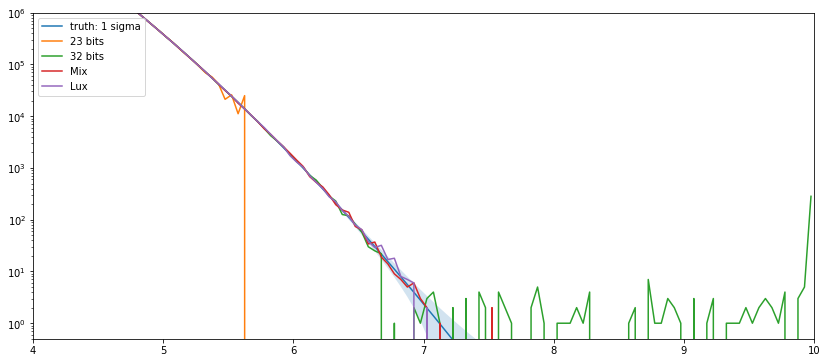

In [16]:
fig, axs = plt.subplots(figsize=(14, 6))
plt.plot(x,truth, label="truth: 1 sigma")
plt.plot(x,val23, label="23 bits")
plt.plot(x,val32, label="32 bits")
plt.plot(x,fast, label="Mix")
plt.plot(x,lux, label="Lux")
plt.fill_between(x, truth - err, truth + err, alpha=0.2)
plt.xlim(4., 10.)
plt.ylim(0.5, 10**6)
plt.yscale("log")
plt.legend(loc='upper left')
plt.show()

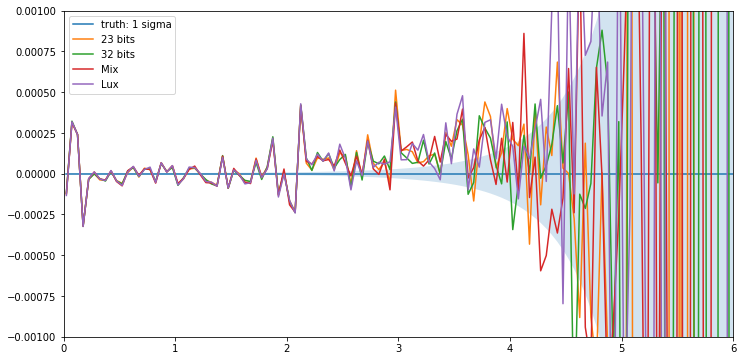

In [17]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(x,(truth-truth)/truth, label="truth: 1 sigma")
plt.plot(x,(val23-truth)/truth, label="23 bits")
plt.plot(x,(val32-truth)/truth, label="32 bits")
plt.plot(x,(fast-truth)/truth, label="Mix")
plt.plot(x,(lux-truth)/truth, label="Lux")
plt.fill_between(x, -err/truth, err/truth, alpha=0.2)
plt.ylim(-0.001, 0.001)
plt.xlim(0., 6.)
# plt.yscale("log")
plt.legend(loc='upper left')
plt.show()

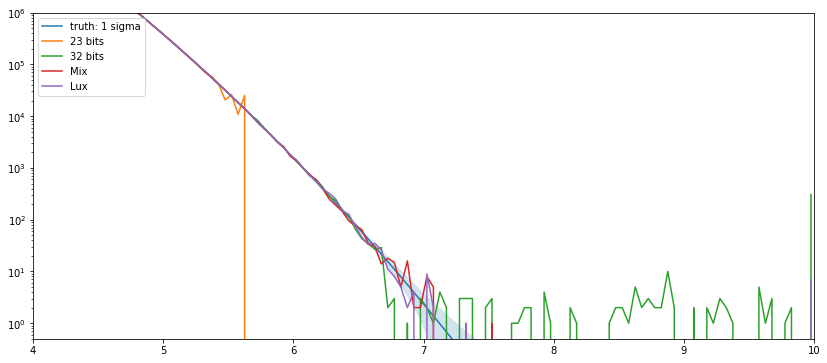

In [18]:
fig, axs = plt.subplots(figsize=(14, 6))
plt.plot(x,truth, label="truth: 1 sigma")
plt.plot(x,val23f, label="23 bits")
plt.plot(x,val32f, label="32 bits")
plt.plot(x,fastf, label="Mix")
plt.plot(x,luxf, label="Lux")
plt.fill_between(x, truth - err, truth + err, alpha=0.2)
plt.xlim(4., 10.)
plt.ylim(0.5, 10**6)
plt.yscale("log")
plt.legend(loc='upper left')
plt.show()

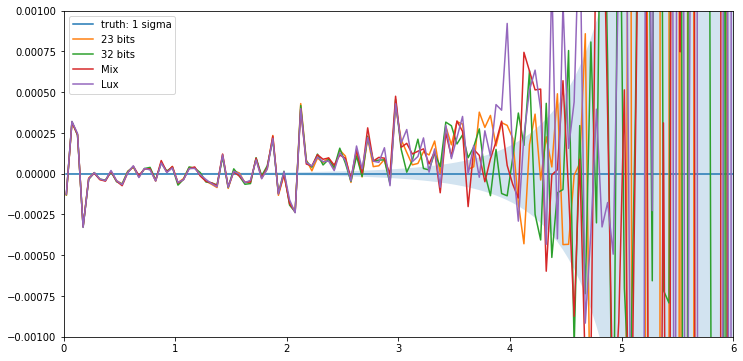

In [19]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(x,(truth-truth)/truth, label="truth: 1 sigma")
plt.plot(x,(val23f-truth)/truth, label="23 bits")
plt.plot(x,(val32f-truth)/truth, label="32 bits")
plt.plot(x,(fastf-truth)/truth, label="Mix")
plt.plot(x,(luxf-truth)/truth, label="Lux")
plt.fill_between(x, -err/truth, err/truth, alpha=0.2)
plt.ylim(-0.001, 0.001)
plt.xlim(0., 6.)
# plt.yscale("log")
plt.legend(loc='upper left')
plt.show()

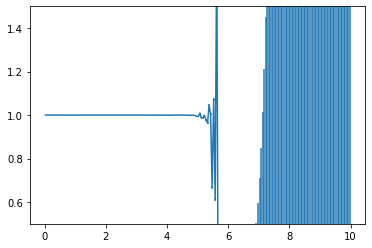

In [20]:
fig = plt.figure()
plt.errorbar(x, ratio23,yerr=err/truth)
plt.ylim(0.5, 1.5)
# plt.xlim(0., 3.)
#plt.plot(x,truth)
# plt.yscale("log")
plt.show()